In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 15s 3us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

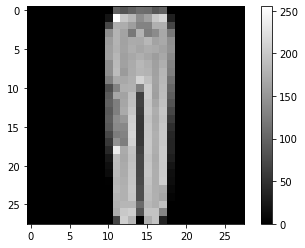

In [15]:
plt.figure()
plt.imshow(train_images[1000],cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.grid(False)
plt.show()

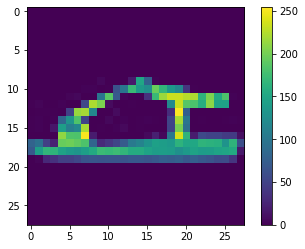

In [14]:
plt.figure()
plt.imshow(train_images[120])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0

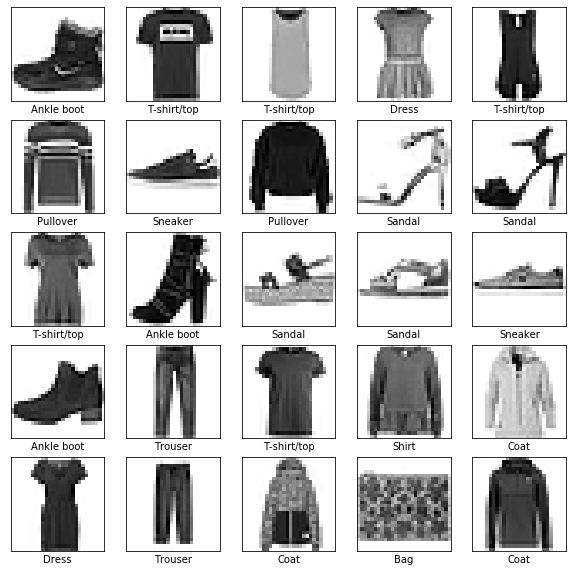

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4993 - accuracy: 0.8263
Epoch 2/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3743 - accuracy: 0.8655
Epoch 3/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3393 - accuracy: 0.8766
Epoch 4/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3142 - accuracy: 0.8858
Epoch 5/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2964 - accuracy: 0.8907
Epoch 6/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2818 - accuracy: 0.8956
Epoch 7/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2679 - accuracy: 0.9012
Epoch 8/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2582 - accuracy: 0.9027
Epoch 9/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2474 - accuracy: 0.9081
Epoch 10/10
60

In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3482 - accuracy: 0.8759

Test accuracy: 0.8759


In [22]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [23]:
predictions = probability_model.predict(test_images)

In [24]:
predictions[0]

array([7.1946931e-07, 9.0919128e-10, 1.5057479e-06, 9.0523275e-07,
       3.2114046e-06, 4.9819768e-04, 1.8249044e-06, 2.1337394e-02,
       5.9432551e-07, 9.7815561e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [26]:
test_labels[0]

9

In [27]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

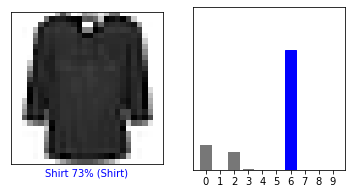

In [32]:
i = 145
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

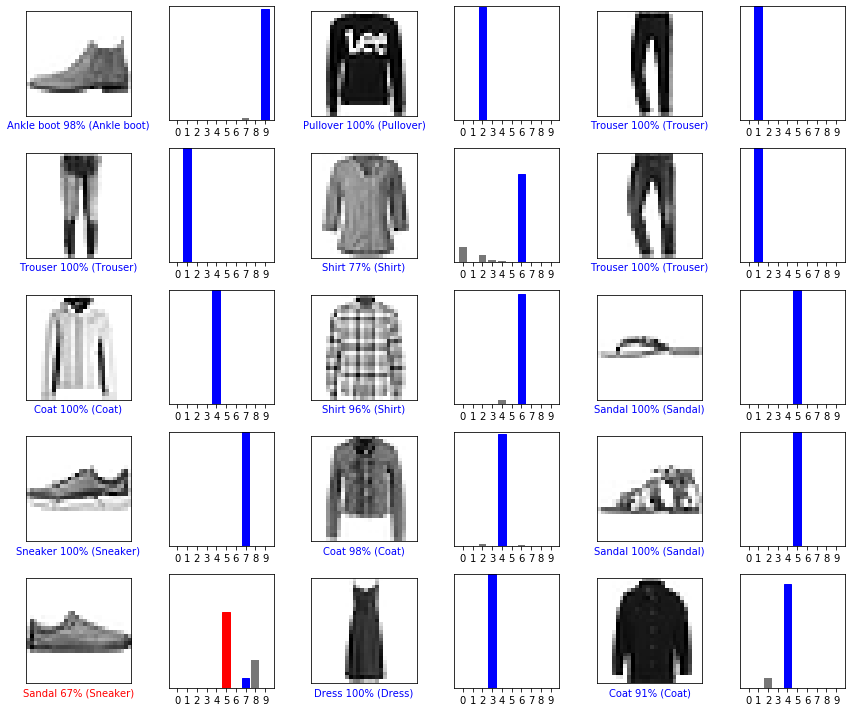

In [33]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [34]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)
